<h1 align=center><font size = 6> Crop Yield Prediction Results. </font></h1>

### Import required libraries.

In [1]:
import numpy as np    #Library to handle data in vectorized manner.
import pandas as pd   #library for data analysis.

#Plotting libray matplotlib and associated ploting modules.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors





%matplotlib inline
print('All the required libraries are imported.....!')

All the required libraries are imported.....!


### Read Dataset into pandas dataframe.

In [2]:
df_result = pd.read_csv("Result.csv")

# Now look at the data frame. 
df_result.head()

,District_name,Predicted_rice,Predicted_wheat,Predicted_jowarr,Predicted_bajra,Predicted_maize,Predicted_ragi,Predicted_gram,Predicted_tur,Predicted_udid,Predicted_mung
0,Ahemadnagar,13304,62226,97891,31057,70645,0,16488,52147,2703,2103
1,Akola,7443,43721,67035,33708,51309,0,17102,33028,2703,1366
2,Amravati,295,37586,56919,23364,39387,491,16487,23819,2702,1366
3,Aurangabad,3582,41754,72141,29572,27263,561,16487,32929,2752,2102
4,Beed,4139,28265,35624,10217,10316,0,16488,24836,2753,2102


### Remove the blank plces from the dataframe.

In [3]:
nan_value = float("NaN")
df_result.replace("", nan_value, inplace=True)
df_result.dropna(subset = ["District_name"], inplace=True)
print("Drop Sucessfull")
#now look at the shape of our data frame.
print("Size of the data frame is :", df_result.shape)

Drop Sucessfull
Size of the data frame is : (33, 11)


### Get Actual Crop yield dataset into pandas datframe.

In [4]:
df_crop = pd.read_csv("crop_production.csv")
df_crop.head()

,District_name,RICE,WHEAT,JOWARR,BAJRA,MAIZE,RAGI,GRAM,TUR,UDID,MUNG
0,Ahemadnagar,21165,81820,290528,223329,120126,2085,28000,11705,6161,328
1,Akola,0,30569,104344,0,0,0,12632,20821,7377,28576
2,Amravati,4773,15209,0,0,0,0,66270,110996,3134,26431
3,Aurangabad,0,74633,79673,80819,417410,0,28673,28388,667,862
4,Beed,189,50908,119590,103479,6048,0,28066,30039,8738,2538


#### remove blank places from dataframe.

In [5]:
nan_value = float("NaN")
df_crop.replace("", nan_value, inplace=True)
df_crop.dropna(subset = ["District_name"], inplace=True)
print("Drop Sucessfull")
#now look at the shape of our data frame.
print("Size of the data frame is :", df_result.shape)

Drop Sucessfull
Size of the data frame is : (33, 11)


## Prediction Result analysis :

### Set District Name as index in result dataframe:

In [6]:
#Set the district name as index - useful for quickly looking up district using .loc method
df_result.set_index('District_name' , inplace = True)

#now see how data frame looks.
df_result.head()

,Predicted_rice,Predicted_wheat,Predicted_jowarr,Predicted_bajra,Predicted_maize,Predicted_ragi,Predicted_gram,Predicted_tur,Predicted_udid,Predicted_mung
District_name,,,,,,,,,,
Ahemadnagar,13304,62226,97891,31057,70645,0,16488,52147,2703,2103
Akola,7443,43721,67035,33708,51309,0,17102,33028,2703,1366
Amravati,295,37586,56919,23364,39387,491,16487,23819,2702,1366
Aurangabad,3582,41754,72141,29572,27263,561,16487,32929,2752,2102
Beed,4139,28265,35624,10217,10316,0,16488,24836,2753,2102


### Set District Name as index in crop dataframe:

In [7]:
#Set the district name as index - useful for quickly looking up district using .loc method
df_crop.set_index('District_name' , inplace = True)

#now see how data frame looks.
df_crop.head()

,RICE,WHEAT,JOWARR,BAJRA,MAIZE,RAGI,GRAM,TUR,UDID,MUNG
District_name,,,,,,,,,,
Ahemadnagar,21165,81820,290528,223329,120126,2085,28000,11705,6161,328
Akola,0,30569,104344,0,0,0,12632,20821,7377,28576
Amravati,4773,15209,0,0,0,0,66270,110996,3134,26431
Aurangabad,0,74633,79673,80819,417410,0,28673,28388,667,862
Beed,189,50908,119590,103479,6048,0,28066,30039,8738,2538


### Lets analyze the crop yield prediction result data of each district where district name choosed by user.

Please Enter the district name in which you want to analyze crop data in the input field, use the district name from following list.<br>
[Ahemadnagar Akola Amravati Aurangabad Beed Bhandara Buldhana Chandrapur Dhule Gadchiroli Gondia Hingoli Jalgaon Jalna Kolhapur Latur Nagpur Nanded Nandurbar Nashik Osmanabad Parbhani Pune Raigad Ratnagiri Sangli Satara Sindhudurg Solapur Thane Wardha Washim Yavatmal
]<br>

Note : Input field is case sensitive.

In [10]:
value = input("Enter the District Name :")
value

Enter the District Name : Satara


'Satara'

#### Predicted Bar Graph :

#### Prepare result dataframe.

In [11]:
df_pred = df_result.loc[[value]] #assign the data of district which is selected by user input to the new dataframe.

df_pred.reset_index(drop=True, inplace=True) # drop the index.
#transpose dataframe.
df_transpred = df_pred.T

df_transpred.reset_index(drop=True, inplace=True) # drop the index.

#rename column name.
df_transpred.rename(columns={ 0: 'Predicted'}, inplace=True)

#rename index.
df_transpred.rename(index ={ 0: 'RICE', 1: 'WHEAT', 2: 'JOWARR', 3: 'BAJRA', 4: 'MAIZE', 5: 'RAGI', 6: 'GRAM', 7: 'TUR', 8: 'UDID', 9: 'MUNG'}, inplace=True)

df_transpred

,Predicted
RICE,51792
WHEAT,45025
JOWARR,74468
BAJRA,49156
MAIZE,37682
RAGI,5323
GRAM,16486
TUR,35455
UDID,3132
MUNG,2497


#### Prepare crop dataframe.

In [12]:
df_actual = df_crop.loc[[value]] #assign the data of district which is selected by user input to the new dataframe.

df_actual.reset_index(drop=True, inplace=True) # drop the index.
#transpose dataframe.
df_transactual = df_actual.T

#rename column name.
df_transactual.rename(columns={ 0: 'Actual'}, inplace=True)

df_transactual

,Actual
RICE,8000
WHEAT,57600
JOWARR,20400
BAJRA,14300
MAIZE,45200
RAGI,6900
GRAM,17100
TUR,1300
UDID,2700
MUNG,2100


### merge two dataframes.

In [13]:
df_combine = df_transactual.merge(df_transpred,  left_index=True, right_index=True, how="left")
df_combine

,Actual,Predicted
RICE,8000,51792
WHEAT,57600,45025
JOWARR,20400,74468
BAJRA,14300,49156
MAIZE,45200,37682
RAGI,6900,5323
GRAM,17100,16486
TUR,1300,35455
UDID,2700,3132
MUNG,2100,2497


### Now plot the bar graph.

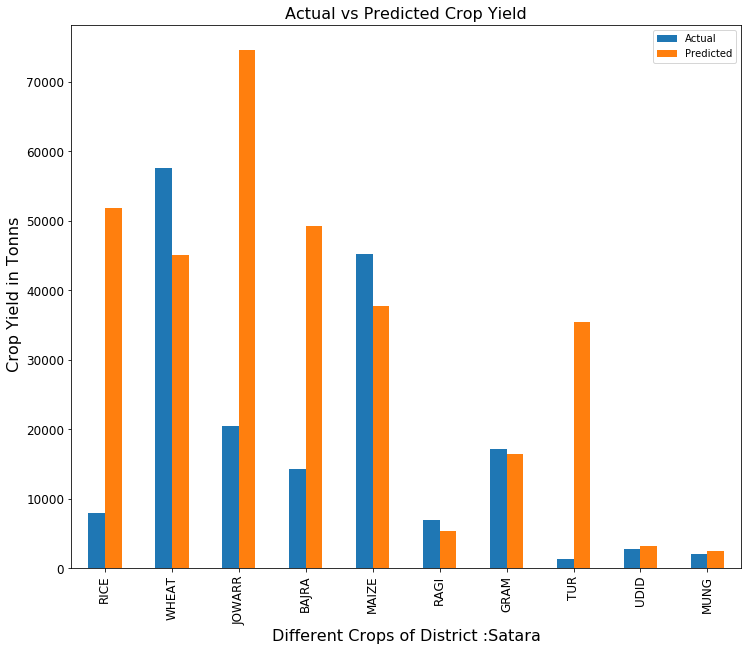

In [15]:

#now lets plot the dtataframe into bar graph.
df_combine.plot(kind="bar", figsize = (12,10),  fontsize = 12)   
plt.title("Actual vs Predicted Crop Yield", fontsize = 16)
plt.xlabel("Different Crops of District :" + value, fontsize = 16)
plt.ylabel(" Crop Yield in Tonns", fontsize = 16)

plt.savefig('Predicted_result.png', format= 'png')
plt.show()


#### Preicted Pie Chart :

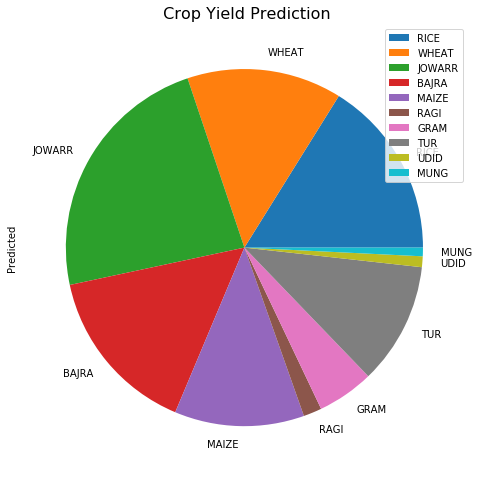

In [16]:
df_transpred.plot.pie(y= 0, figsize=(8, 9))
plt.title(" Crop Yield Prediction", fontsize = 16)
plt.savefig('Prediction_pie.png', format= 'png')

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
